<a href="https://colab.research.google.com/github/SS-yong/Manufacturing_Data_Analysis/blob/main/%EC%9A%A9%EC%A0%91_%EC%98%88%EC%A7%80%EB%B3%B4%EC%A0%84_AI_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from collections import Counter
import tensorflow as tf
from tensorflow.keras import Model ,models, layers, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSS/DATA')

In [ ]:
normal = pd.read_csv('./normal_data.csv', index_col=0)
outlier = pd.read_csv('./outlier_data.csv')

In [ ]:
normal.head()

,WK_DT,PIPE_NO,DV_R,DA_R,AV_R,AA_R,PM_R,FIN_JGMT
0,20220117080000100,PP22041200707,308,7962,364,5975,9270,1
1,20220117080000100,PP22041200707,308,7962,364,5975,9270,1
2,20220117080000400,PP22041200707,319,8351,360,5964,9270,1
3,20220117080000400,PP22041200707,319,8351,360,5964,9270,1
4,20220117080000600,PP22041200707,320,8312,361,5983,9270,1


In [ ]:
outlier.head()

,WK_DT,PIPE_NO,DV_R,DA_R,AV_R,AA_R,PM_R,FIN_JGMT
0,20220331210011700,PP22032200038,250,7000,255,4000,5000,0
1,20220331210012000,PP22032200038,255,7100,260,4200,5100,0
2,20220331210012000,PP22032200038,260,7200,255,4100,5200,0
3,20220331210012100,PP22032200038,255,7100,250,4300,5100,0
4,20220331210012100,PP22032200038,250,7000,255,4400,5000,0


In [ ]:
normal_data = normal.copy()
outlier_data = outlier.copy()

In [ ]:
normal_data['FIN_JGMT'] = 0
outlier_data['FIN_JGMT'] = 1

In [ ]:
print('Normal Data 개수 : {}'.format(len(normal_data)))
print('Outlier Data 개수 : {}'.format(len(outlier_data)))

Normal Data 개수 : 81775
Outlier Data 개수 : 18225


In [ ]:
normal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
WK_DT,81775.0,2.022032e+16,3.586939e+10,2.022012e+16,2.022032e+16,2.022033e+16,2.022033e+16,2.022033e+16
DV_R,81775.0,3.163841e+02,5.417964e+00,3.080000e+02,3.090000e+02,3.200000e+02,3.200000e+02,3.230000e+02
DA_R,81775.0,8.232345e+03,1.833009e+02,7.934000e+03,8.027000e+03,8.299000e+03,8.326000e+03,8.653000e+03
AV_R,81775.0,3.598714e+02,2.233517e+00,3.570000e+02,3.580000e+02,3.600000e+02,3.620000e+02,3.700000e+02
AA_R,81775.0,6.033531e+03,8.989939e+02,5.948000e+03,5.961000e+03,6.005000e+03,6.049000e+03,5.000300e+04
PM_R,81775.0,9.295602e+03,3.111099e+01,9.270000e+03,9.275000e+03,9.290000e+03,9.317000e+03,1.071700e+04
FIN_JGMT,81775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
outlier_data.describe().T

,count,mean,std,min,25%,50%,75%,max
WK_DT,18225.0,2.022039e+16,2.474427e+10,2.022033e+16,2.022040e+16,2.022040e+16,2.022040e+16,2.022040e+16
DV_R,18225.0,2.549997e+02,3.611732e+00,2.500000e+02,2.500000e+02,2.550000e+02,2.600000e+02,2.600000e+02
DA_R,18225.0,7.023413e+03,1.212496e+02,6.800000e+03,6.900000e+03,7.000000e+03,7.100000e+03,7.300000e+03
AV_R,18225.0,2.550378e+02,3.855296e+00,2.500000e+02,2.500000e+02,2.550000e+02,2.600000e+02,3.040000e+02
AA_R,18225.0,4.122521e+03,1.900472e+02,3.800000e+03,4.000000e+03,4.100000e+03,4.300000e+03,4.500000e+03
PM_R,18225.0,4.969558e+03,1.516211e+02,4.700000e+03,4.800000e+03,5.000000e+03,5.100000e+03,5.200000e+03
FIN_JGMT,18225.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
normal_data.isnull().sum()

WK_DT       0
PIPE_NO     0
DV_R        0
DA_R        0
AV_R        0
AA_R        0
PM_R        0
FIN_JGMT    0
dtype: int64

In [ ]:
outlier_data.isnull().sum()

WK_DT       0
PIPE_NO     0
DV_R        0
DA_R        0
AV_R        0
AA_R        0
PM_R        0
FIN_JGMT    0
dtype: int64

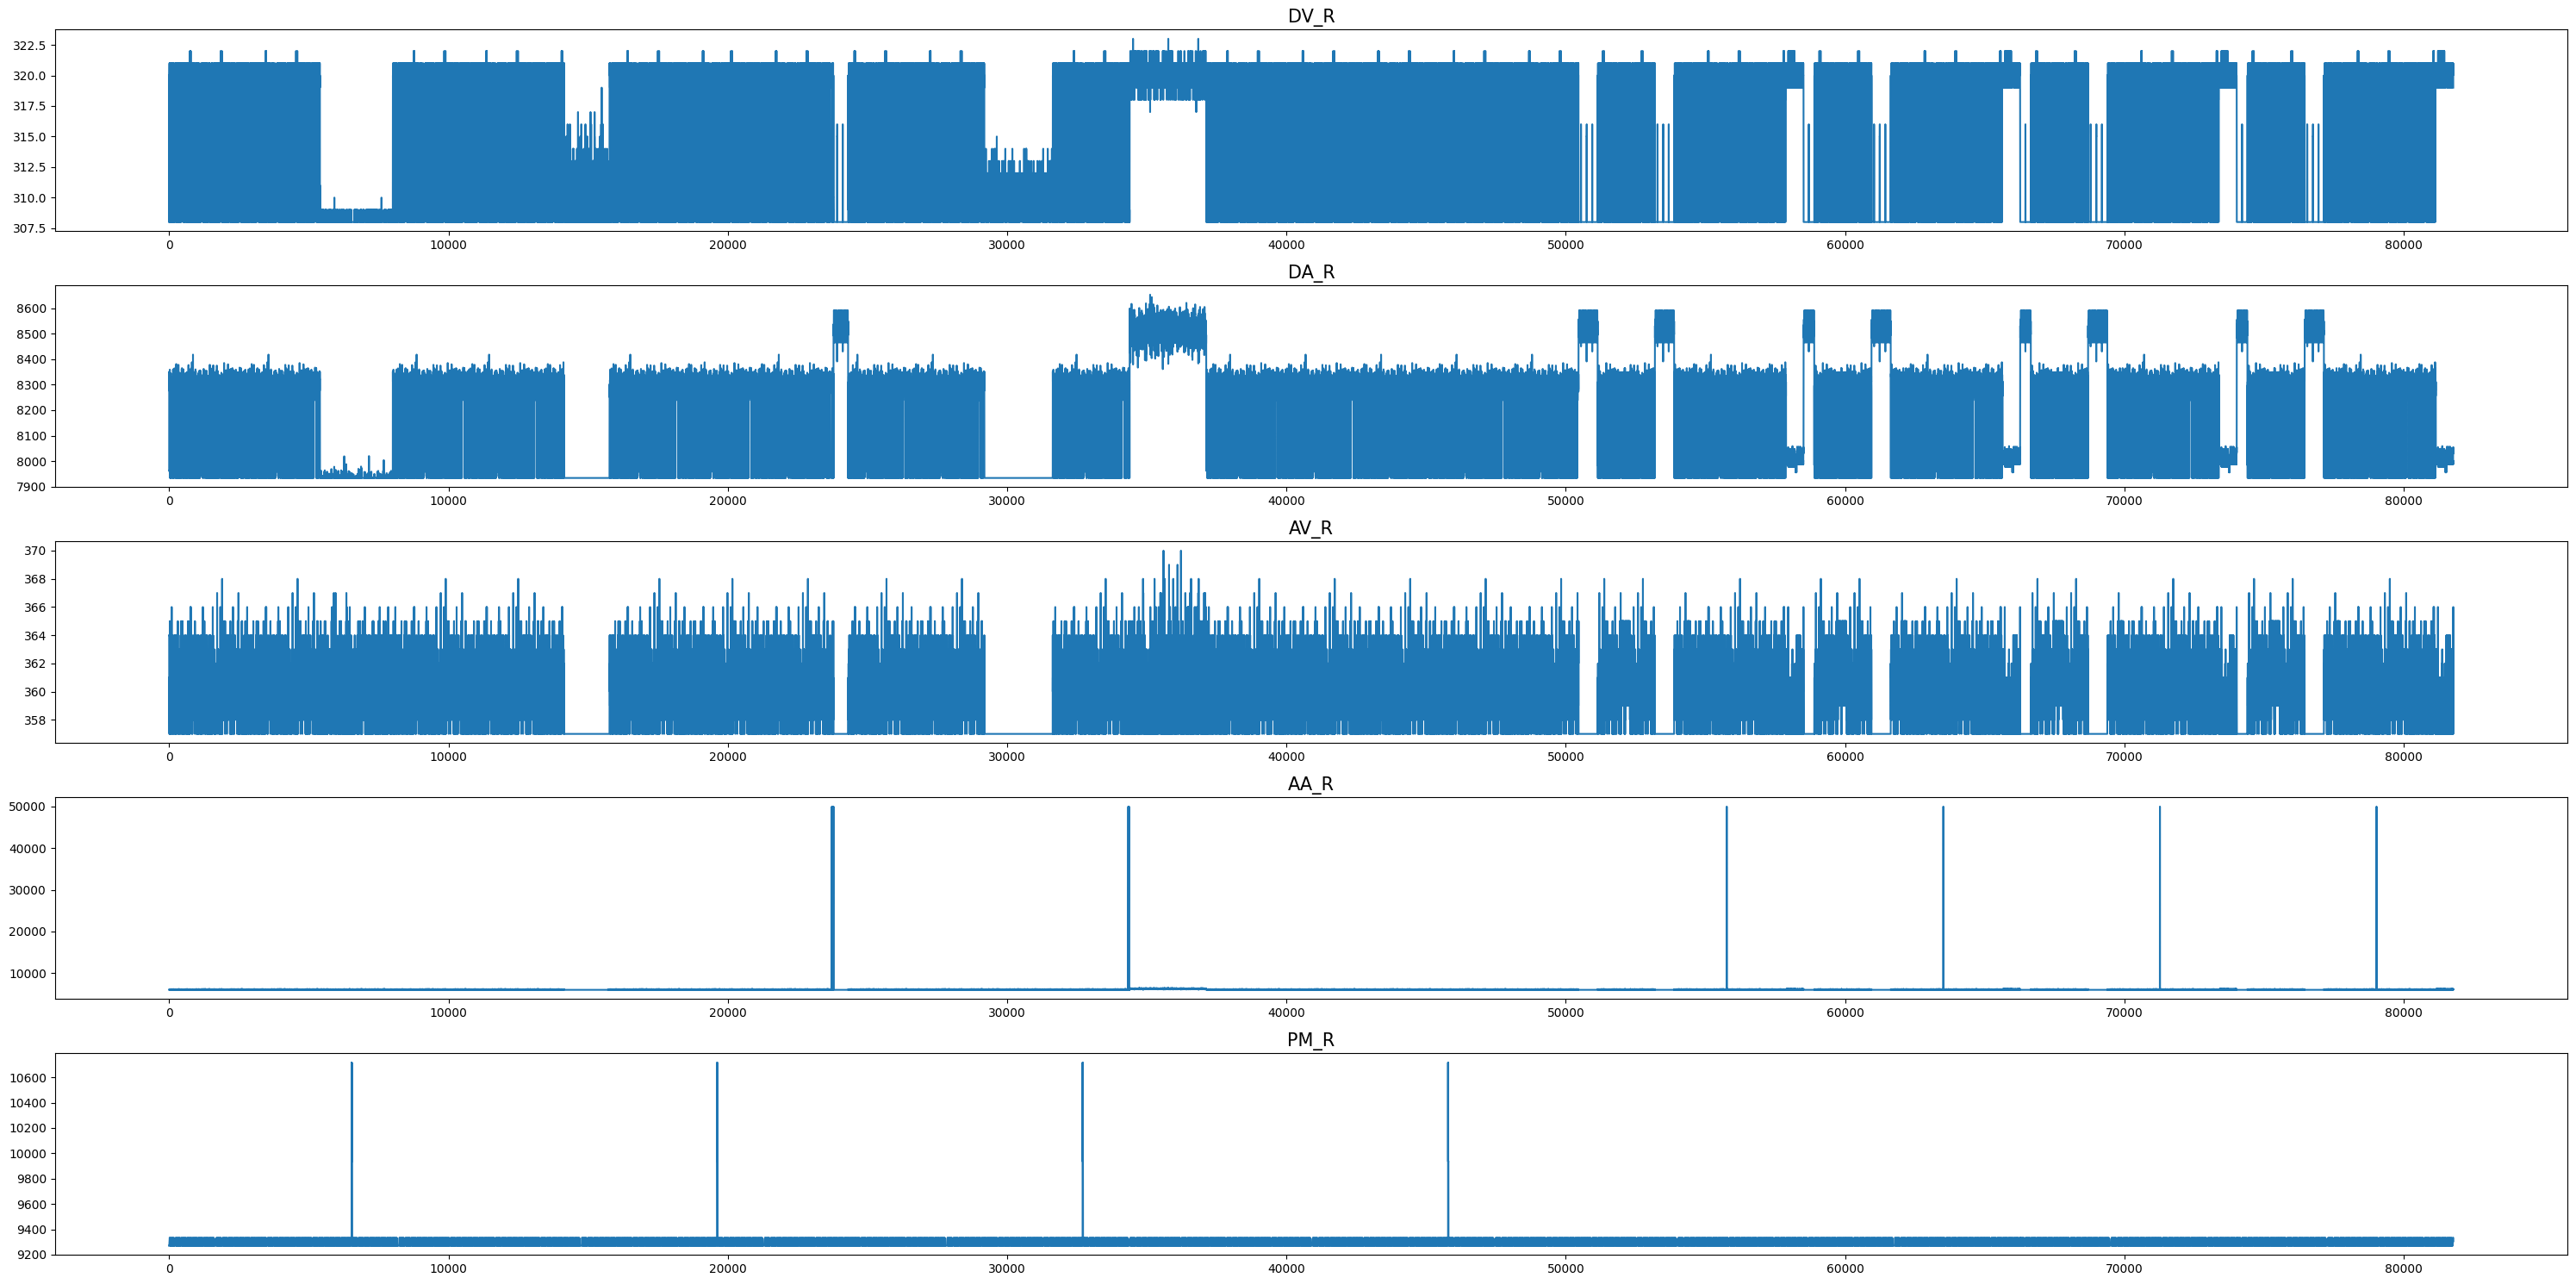

In [ ]:
use_col = ['DV_R', 'DA_R', 'AV_R', 'AA_R', 'PM_R']
plt.figure(figsize=(30,15))
for i in range(len(use_col)):
    plt.subplot(5, 1, i+1)
    plt.title(use_col[i], fontsize=15)
    plt.plot(normal_data[use_col[i]])
plt.tight_layout()

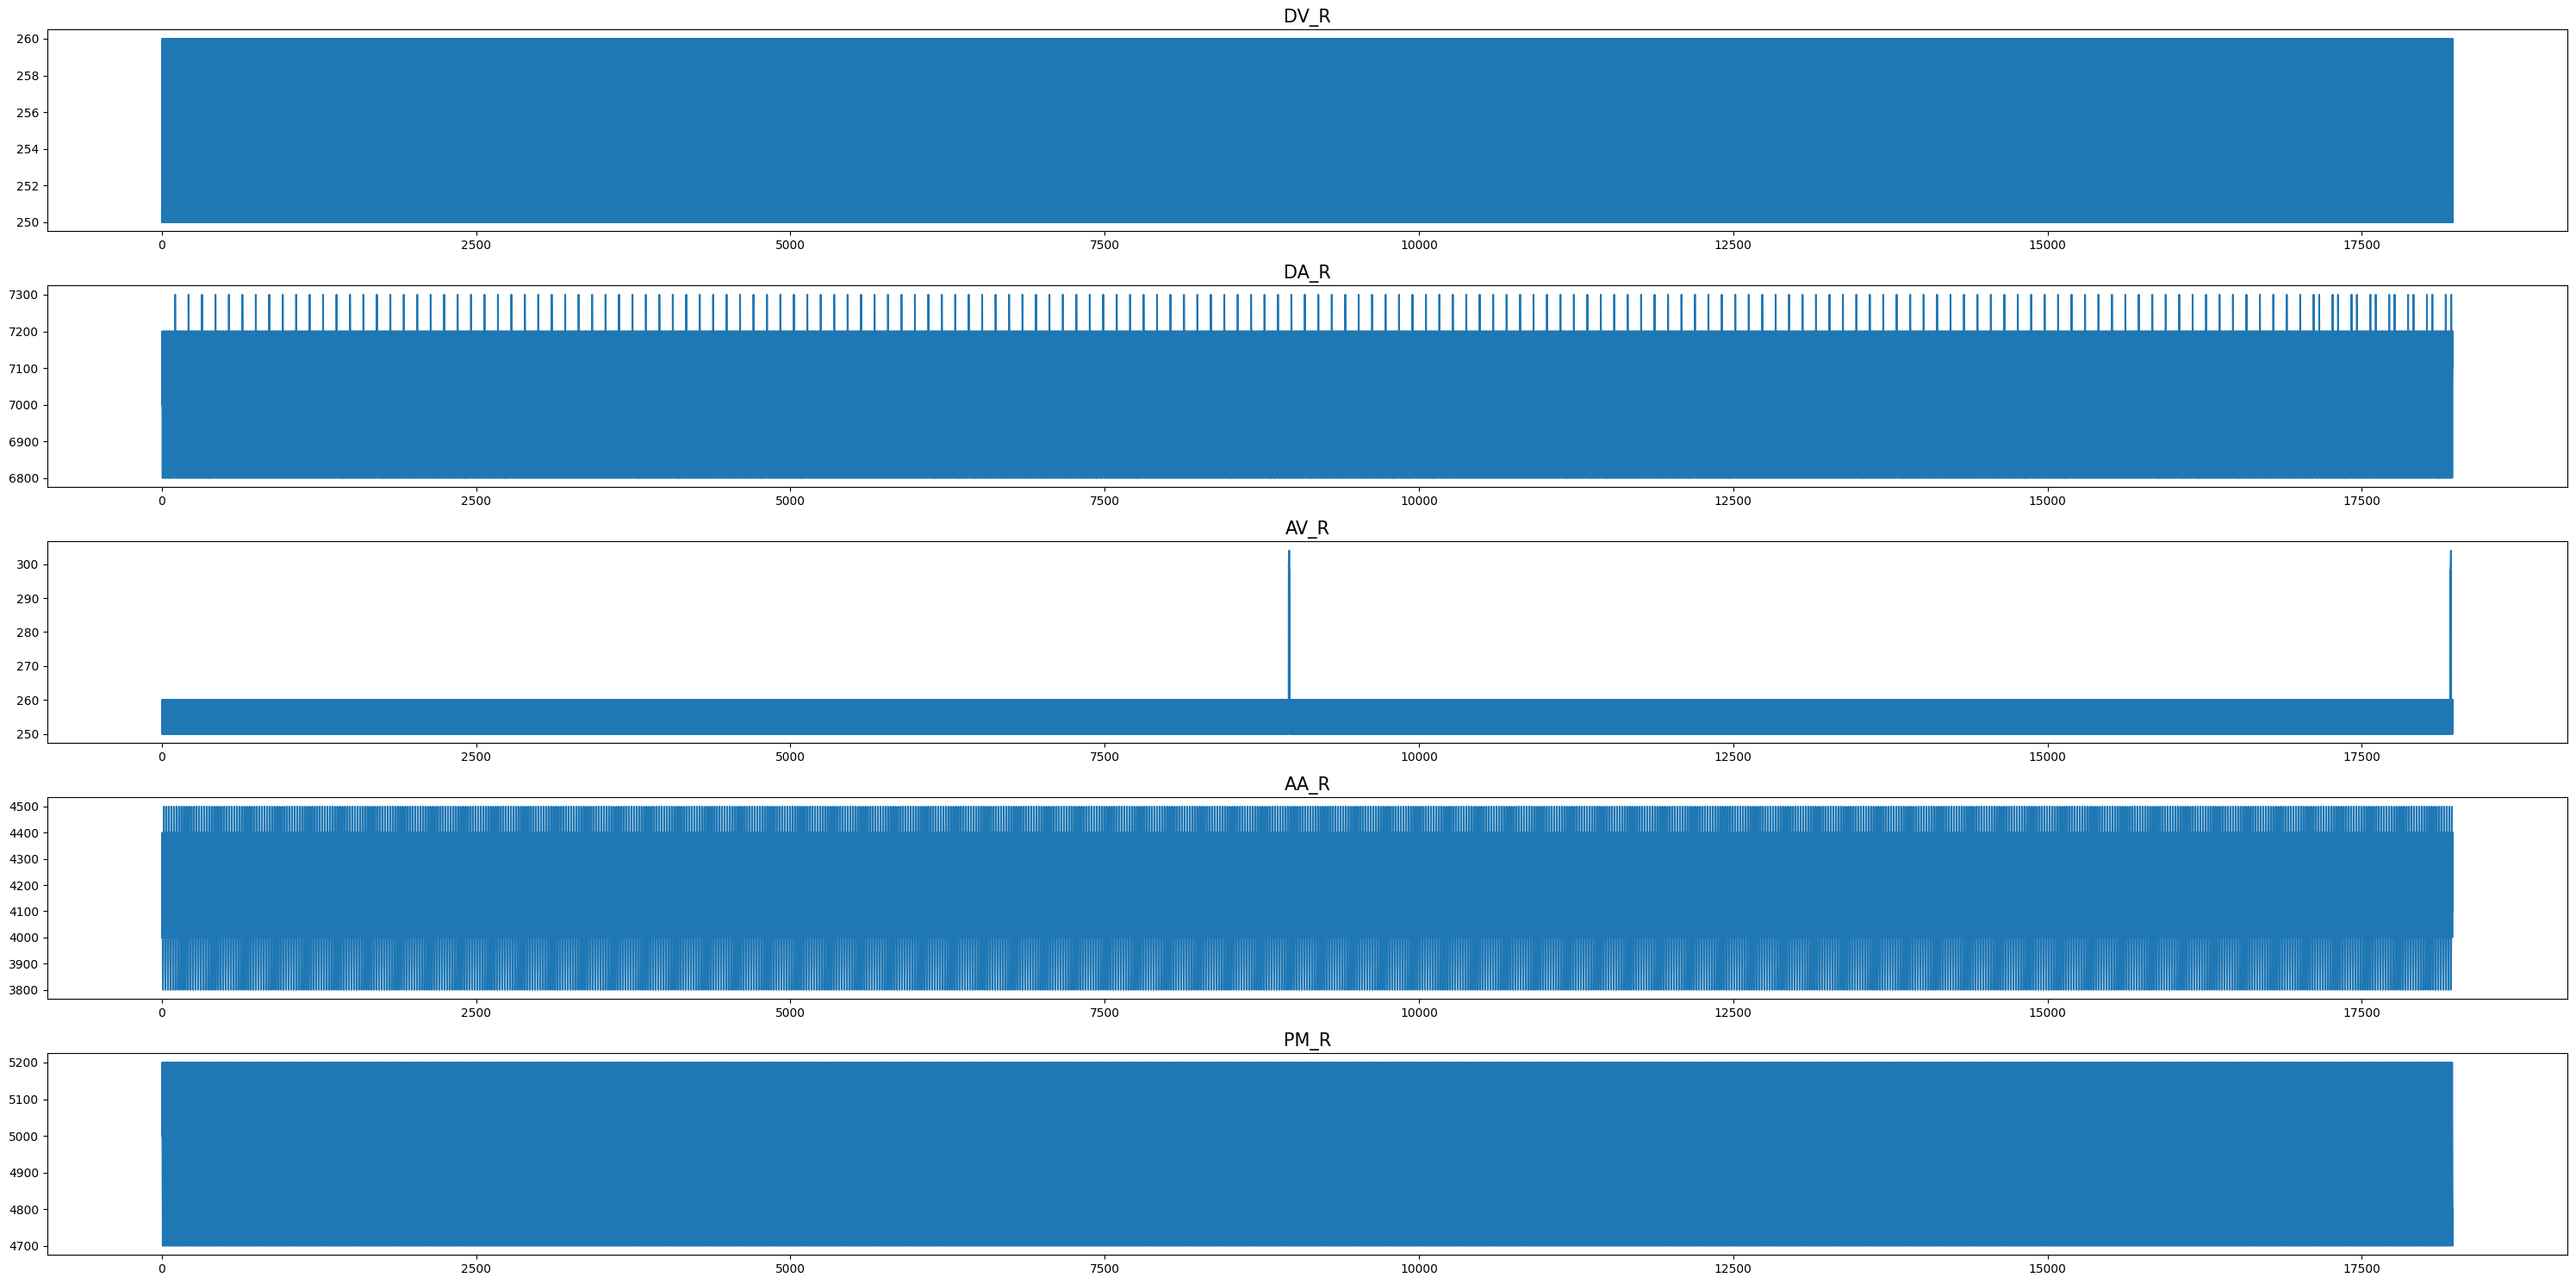

In [ ]:
use_col = ['DV_R', 'DA_R', 'AV_R', 'AA_R', 'PM_R']
plt.figure(figsize=(30, 15))
for i in range(len(use_col)):
    plt.subplot(5, 1, i+1)
    plt.title(use_col[i], fontsize=15)
    plt.plot(outlier_data[use_col[i]])
plt.tight_layout()

In [ ]:
normal_data[use_col].corr()

,DV_R,DA_R,AV_R,AA_R,PM_R
DV_R,1.000000,0.549911,0.227507,-0.017099,-0.002639
DA_R,0.549911,1.000000,-0.006445,-0.027666,-0.010015
AV_R,0.227507,-0.006445,1.000000,-0.051845,0.006900
AA_R,-0.017099,-0.027666,-0.051845,1.000000,-0.006116
PM_R,-0.002639,-0.010015,0.006900,-0.006116,1.000000


In [ ]:
outlier_data[use_col].corr()

,DV_R,DA_R,AV_R,AA_R,PM_R
DV_R,1.000000,0.000015,0.039606,-0.000231,-0.118956
DA_R,0.000015,1.000000,-0.001377,0.001453,-0.004359
AV_R,0.039606,-0.001377,1.000000,-0.006244,0.092105
AA_R,-0.000231,0.001453,-0.006244,1.000000,0.000342
PM_R,-0.118956,-0.004359,0.092105,0.000342,1.000000


In [ ]:
X_normal = normal_data[use_col]
y_normal = normal_data['FIN_JGMT']
X_anomaly = outlier_data[use_col]
y_anomaly = outlier_data['FIN_JGMT']

In [ ]:
X_train_normal = X_normal[:60000]
y_train_normal = y_normal[:60000]
X_test_normal = X_normal[60000:]
y_test_normal = y_normal[60000:]
X_test_anomaly = X_anomaly
y_test_anomaly = y_anomaly

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_normal_scaled = scaler.transform(X_test_normal)
X_test_anomaly_scaled = scaler.transform(X_test_anomaly)
y_train_normal = np.array(y_train_normal)
y_test_normal = np.array(y_test_normal)
y_test_anomaly = np.array(y_test_anomaly)

In [ ]:
sequence = 20
X_train, Y_train = [], []
Y_tr_index = []
for index in range(len(X_train_scaled) - sequence - 40):
    X_train.append(X_train_scaled[index: index + sequence])
    Y_train.append(X_train_scaled[index + sequence + 20 : index + sequence + 40])
    Y_tr_index.append(y_train_normal[index + sequence + 40])
X_test_normal, Y_test_normal = [], []
Y_te_index_1 = []
for index in range(len(X_test_normal_scaled) - sequence - 40):
    X_test_normal.append(X_test_normal_scaled[index: index + sequence])
    Y_test_normal.append(X_test_normal_scaled[index + sequence + 20 : index + sequence + 40])
    Y_te_index_1.append(y_test_normal[index + sequence + 40])
X_test_anomal, Y_test_anomal = [], []
Y_te_index_2 = []
for index in range(len(X_test_anomaly_scaled) - sequence - 40):
    X_test_anomal.append(X_test_anomaly_scaled[index: index + sequence])
    Y_test_anomal.append(X_test_anomaly_scaled[index + sequence + 20 : index + sequence + 40])
    Y_te_index_2.append(y_test_anomaly[index + sequence + 40])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test_normal, Y_test_normal = np.array(X_test_normal), np.array(Y_test_normal)
X_test_anomal, Y_test_anomal = np.array(X_test_anomal), np.array(Y_test_anomal)
Y_tr_index, Y_te_index_1, Y_te_index_2 = np.array(Y_tr_index), np.array(Y_te_index_1), np.array(Y_te_index_2)

In [ ]:
X_valid_normal, Y_valid_normal = X_test_normal[:4000, :, :], Y_test_normal[:4000, :, :]
Y_val_index_1 = Y_te_index_1[:4000]
X_test_normal, Y_test_normal = X_test_normal[4000:, :, :], Y_test_normal[4000:, :, :]
Y_te_index_1 = Y_te_index_1[4000:]
X_valid_anomal, Y_valid_anomal = X_test_anomal[:1200, :, :], Y_test_anomal[:1200, :, :]
Y_val_index_2 = Y_te_index_2[:1200]
X_test_anomal, Y_test_anomal = X_test_anomal[1200:, :, :], Y_test_anomal[1200:, :, :]
Y_te_index_2 = Y_te_index_2[1200:]
X_valid = np.vstack((X_valid_normal, X_valid_anomal))
Y_valid = np.vstack((Y_valid_normal, Y_valid_anomal))
Y_val_index = np.hstack((Y_val_index_1, Y_val_index_2))
X_test = np.vstack((X_test_normal, X_test_anomal))
Y_test = np.vstack((Y_test_normal, Y_test_anomal))
Y_te_index = np.hstack((Y_te_index_1, Y_te_index_2))

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_valid, Y_valid = np.array(X_valid), np.array(Y_valid)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_valid:', X_valid.shape, 'Y_valid:', Y_valid.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (59940, 20, 5) Y_train: (59940, 20, 5)
X_valid: (5200, 20, 5) Y_valid: (5200, 20, 5)
X_test: (34680, 20, 5) Y_test: (34680, 20, 5)


In [ ]:
X_valid_0 = X_valid[Y_val_index==0]
Y_valid_0 = Y_valid[Y_val_index==0]

In [ ]:
def LSTM_AE(sequence, n_features):
    lstm_ae = models.Sequential()
    # Encoder
    lstm_ae.add(layers.LSTM(64, input_shape=(sequence, n_features), return_sequences=True))
    lstm_ae.add(layers.LSTM(32, return_sequences=False))
    lstm_ae.add(layers.RepeatVector(sequence))
    # Decoder
    lstm_ae.add(layers.LSTM(32, return_sequences=True))
    lstm_ae.add(layers.LSTM(64, return_sequences=True))
    lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))
    return lstm_ae
lstm_ae = LSTM_AE(20, 5)
lstm_ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVecto  (None, 20, 32)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 20, 32)            8320      
                                                                 
 lstm_3 (LSTM)               (None, 20, 64)            24832     
                                                                 
 time_distributed (TimeDist  (None, 20, 5)             325       
 ributed)                                               

In [ ]:
#모델 학습 과정에서의 Callbacks 선언
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=8, verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=17, verbose=1, mode='min', restore_best_weights=True)
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(0.001))
#fit
history = lstm_ae.fit(X_train, Y_train,
                      epochs=200, batch_size=32,
                      callbacks=[reduce_lr, es], validation_data=(X_valid_0, Y_valid_0))

Epoch 1/200
1874/1874 [==============================] - 44s 14ms/step - loss: 0.0311 - val_loss: 0.0317 - lr: 0.0010
Epoch 2/200
1874/1874 [==============================] - 20s 11ms/step - loss: 0.0297 - val_loss: 0.0314 - lr: 0.0010
Epoch 3/200
1874/1874 [==============================] - 19s 10ms/step - loss: 0.0295 - val_loss: 0.0314 - lr: 0.0010
Epoch 4/200
1874/1874 [==============================] - 19s 10ms/step - loss: 0.0290 - val_loss: 0.0303 - lr: 0.0010
Epoch 5/200
1874/1874 [==============================] - 19s 10ms/step - loss: 0.0276 - val_loss: 0.0286 - lr: 0.0010
Epoch 6/200
1874/1874 [==============================] - 19s 10ms/step - loss: 0.0251 - val_loss: 0.0259 - lr: 0.0010
Epoch 7/200
1874/1874 [==============================] - 20s 10ms/step - loss: 0.0226 - val_loss: 0.0239 - lr: 0.0010
Epoch 8/200
1874/1874 [==============================] - 18s 10ms/step - loss: 0.0202 - val_loss: 0.0212 - lr: 0.0010
Epoch 9/200
1874/1874 [==============================] -

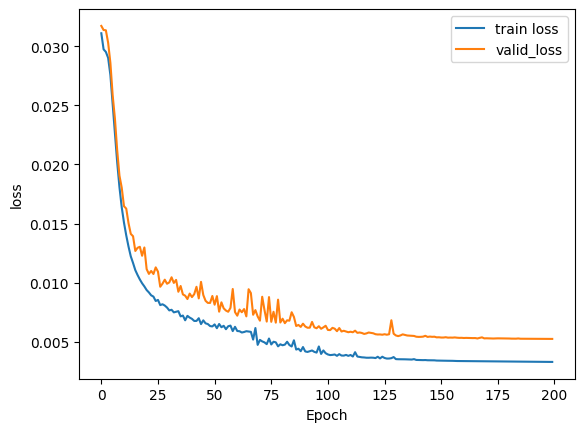

In [ ]:
#모델 학습 반복 수에 따른 loss 감소 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid_loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

163/163 [==============================] - 3s 5ms/step


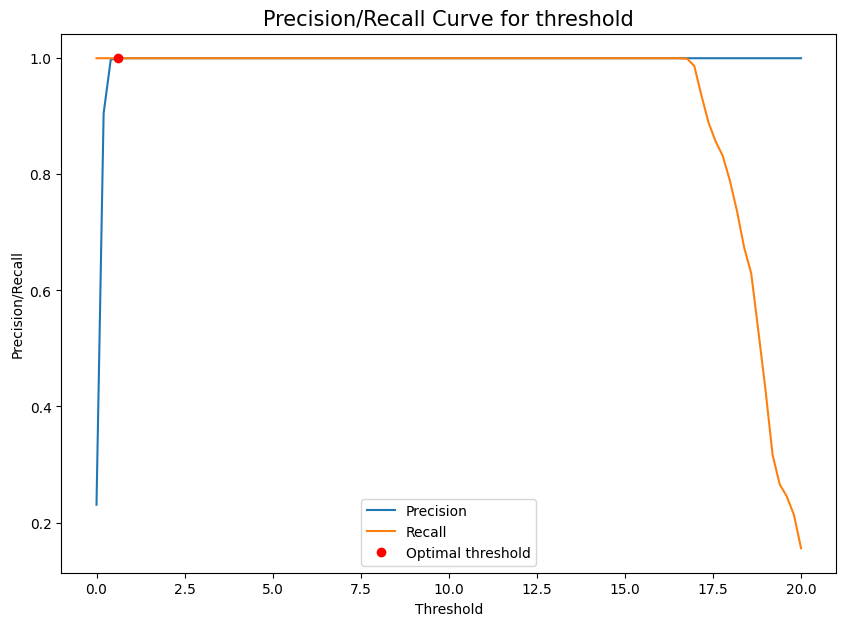

precision:  1.0 , recall:  1.0
threshold:  0.6060606060606061


In [ ]:
def flatten(X):
    flattened = np.empty((X.shape[0], X.shape[2])) # sample x features array.
    for i in range(X.shape[0]):
        flattened[i] = X[i, X.shape[1]-1, :]
    return(flattened)

# LSTM-Autoencoder 임곗값 지정 및 임곗값에 따른 정밀도와 재현율 곡선 시각화
valid_x_predictions = lstm_ae.predict(X_valid)
mse = np.mean(np.power(flatten(X_valid) - flatten(valid_x_predictions),2), axis=1)

threshold = np.linspace(0, 20, 100)

pr_list = []
for thr in threshold:
    pr_list.append(precision_score(list(Y_val_index), mse>thr))
precision = pr_list

rc_list = []
for thr in threshold:
    rc_list.append(recall_score(list(Y_val_index), mse>thr))
recall = rc_list

index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision, recall)) if p==r][0]
threshold_final = threshold[index_cnt]

plt.figure(figsize=(10,7))
plt.title('Precision/Recall Curve for threshold', fontsize=15)
plt.plot(threshold, precision, label='Precision')
plt.plot(threshold, recall, label='Recall')
plt.plot(threshold_final, precision[index_cnt], 'o', color='r', label='Optimal threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

print('precision: ',precision[index_cnt],', recall: ',recall[index_cnt])
print('threshold: ',threshold_final)

In [ ]:
# 설정한 임곗값 검증
test_x_predictions = lstm_ae.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(test_x_predictions), 2), axis=1)
plt.figure(figsize=(10,7))
plt.title('Reconstruction Error for both classes', fontsize=15)
plt.plot(np.where(Y_te_index==1)[0], mse[Y_te_index==1], marker='o', linestyle='', label='Anomaly')
plt.plot(np.where(Y_te_index==0)[0], mse[Y_te_index==0], marker='o', linestyle='', label='Normal')
plt.axhline(threshold_final, 0, len(Y_test), color='r', linestyle='--', label='Threshold for Anomaly')
plt.legend()
plt.ylabel('Reconstruction Error')
plt.show()

1084/1084 [==============================] - 5s 4ms/step


2.0 0.0


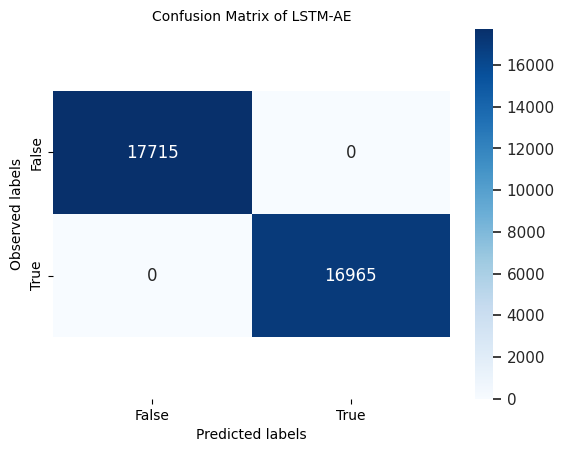

In [ ]:
pred_y = [1 if e > threshold_final else 0 for e in mse]
ax = plt.subplot()
sns.set(font_scale=1.0)
cm = confusion_matrix(list(Y_te_index), pred_y)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");
label_font = {'size':'10'}
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);
title_font = {'size':'10'}
ax.set_title('Confusion Matrix of LSTM-AE', fontdict=title_font);
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);
bottom, top = ax.get_ylim()
print(bottom, top)
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [ ]:
metrics.accuracy_score(list(Y_te_index), pred_y)

1.0

In [ ]:
metrics.f1_score(list(Y_te_index), pred_y)

1.0